# Project 1
## Discriminant Function Analysis & Principal component analysis
***
Discriminant Function Analysis (DFA): Calculating the discriminant function of data points and analyzing them.  
Calculate pooled covariance and derive statical analysis: confusion matrix.  
And perform Principal component analysis.
***
Discriminant function analysis (DFA) is a statistical method used to classify unknown individuals into a certain group. DFA is a supervised classification technique that uses a mathematical function to distinguish between predefined groups of samples. DFA is used to determine which variables contribute most to group separation.
***
Principal component analysis (PCA) is an unsupervised learning method in that it does not use the output information; the criterion to be maximized is the variance.  
This statistical technique helps enormous data to be condensed into a more manageable data for easier visualization and interpretation.
***
Packages used: Pandas, numpy, matplotlib, sklearn
***
Attribute Information:
The Kecimen and Besni raisin varieties were obtained with CVS. 
A total of 900 raisins were used, including 450 from both varieties, and 7 
morphological features were extracted.

- Area: Gives the number of pixels within the boundaries of the raisin. 
- Perimeter: It measures the environment by calculating the distance between 
    the boundaries of the raisin and the pixels around it.
- MajorAxisLength: Gives the length of the main axis, which is the longest 
    line that can be drawn on the raisin.
- MinorAxisLength: Gives the length of the small axis, which is the shortest
    line that can be drawn on the raisin.
- Eccentricity: It gives a measure of the eccentricity of the ellipse, which
    has the same moments as raisins. 
- ConvexArea: Gives the number of pixels of the smallest convex shell of the
    region formed by the raisin.
- Extent: Gives the ratio of the region formed by the raisin to the total
    pixels in the bounding box.
- Class: Kecimen and Besni raisin.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Reading the File

In [2]:
data = pd.read_csv('Raisin_Dataset.csv')
print(data.head())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


In [3]:
print(data.isnull().sum())

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


There are no missing values in the data 

In [4]:
# Extract the Class from the DataFrame
classes = data['Class']

numClasses = classes.nunique()

print(f"There are {numClasses} classes in the data set which are",
      (", ").join(classes.unique()))

There are 2 classes in the data set which are Kecimen, Besni


Calculating the mean vector and covariance matrix for the input attributes in each class.

In [5]:
# Group the data by Kecimen, Besni to separate it into different classes
grouped_data = data.groupby('Class')

mean_vectors = {}
for classLabel, group in grouped_data:
    # Calculate the mean vector for each class
    mean_vectors[classLabel] = group.iloc[:, :-1].mean().values

classStats = {}
for classLabel in classes.unique():

    classData = data[data['Class'] == classLabel]
    classData = classData.drop(columns=['Class'])

    meanVector = np.mean(classData, axis=0)  # Mean
    covarianceMatrix = np.cov(classData, rowvar=False)  # Covariance

    classStats[classLabel] = {
        'meanVector': meanVector,
        'covarianceMatrix': covarianceMatrix
    }

for classLabel, stats in classStats.items():
    print(f"\nClass {classLabel} Mean Vector:")
    print(*stats['meanVector'])
    print(f"\nClass {classLabel} Covariance Matrix:")
    print(stats['covarianceMatrix'])


Class Kecimen Mean Vector:
63413.46666666667 352.8592489906667 229.35259210444443 0.7419595361888889 65696.35555555555 0.7077742460777777 983.6862355555555

Class Kecimen Covariance Matrix:
[[ 3.14273786e+08  9.48747383e+05  5.26930055e+05  1.22544439e+02
   3.34178076e+08 -2.07582479e+00  2.54722952e+06]
 [ 9.48747383e+05  3.55353016e+03  1.18448636e+03  2.51733540e+00
   1.03802111e+06 -5.20182414e-01  8.54753908e+03]
 [ 5.26930055e+05  1.18448636e+03  1.15999213e+03 -1.20695931e+00
   5.46132789e+05  3.02579660e-01  3.86602972e+03]
 [ 1.22544439e+02  2.51733540e+00 -1.20695931e+00  8.53068902e-03
   1.67623514e+02 -1.48948577e-03  2.94190389e+00]
 [ 3.34178076e+08  1.03802111e+06  5.46132789e+05  1.67623514e+02
   3.61223925e+08 -4.86447443e+01  2.79465818e+06]
 [-2.07582479e+00 -5.20182414e-01  3.02579660e-01 -1.48948577e-03
  -4.86447443e+01  1.88722736e-03 -1.03066330e+00]
 [ 2.54722952e+06  8.54753908e+03  3.86602972e+03  2.94190389e+00
   2.79465818e+06 -1.03066330e+00  2.2591

***
### Discriminant Function Analysis (DFA)

A discriminant function is a function of a set of variables that is used to discriminate between or classify samples of events or objects. It is a linear function of measurements of different properties of an object or event that is used to assign the object or event to one population or another.  
Finding pooled covariance of all classes
$$
  Pooled\ Covariance = \frac{Sum\ of\ Covariance\ of\ each\ class}{Number\ of\ Covariances}
$$
And then calculating the discriminant functions it for each sample point and label each of them
with the class name.  
Saving the predicted class to a CSV file.

In [6]:
pooledCovarianceM = classStats['Kecimen']['covarianceMatrix'] + \
    classStats['Besni']['covarianceMatrix']
pooledCovarianceM = pooledCovarianceM/2


# Discriminant function that computes the Mahalanobis distance
def discriminant_function(x, mean, covariance):
    return -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(covariance)),
                         (x - mean))


discriminant_functions = []  # new
for index, row in data.iterrows():
    x = row[:-1].values
    discriminants = {}

    # Calculate the discriminant value for each class
    for classLabel, mean_vector in mean_vectors.items():
        discriminant = discriminant_function(x, mean_vector,
                                             pooledCovarianceM)
        discriminants[classLabel] = discriminant
    predictedClass = max(discriminants, key=discriminants.get)
    discriminant_functions.append([row['Class'], predictedClass,
                                   discriminants])

result_df = pd.DataFrame(discriminant_functions,
                         columns=['TrueClass', 'PredictedClass',
                                  'Discriminants'])

result_df.to_csv('DF_results.csv', index=False)

print("Saved to 'DF_results.csv'")
print(pd.read_csv('DF_results.csv').head())

Saved to 'DF_results.csv'
  TrueClass PredictedClass                                      Discriminants
0   Kecimen          Besni  {'Besni': -1.66667415789564, 'Kecimen': -2.449...
1   Kecimen          Besni  {'Besni': -1.0096324939538455, 'Kecimen': -1.2...
2   Kecimen          Besni  {'Besni': -1.6019029897774286, 'Kecimen': -2.8...
3   Kecimen        Kecimen  {'Besni': -4.907145908457189, 'Kecimen': -1.04...
4   Kecimen        Kecimen  {'Besni': -6.8008461003160985, 'Kecimen': -4.7...


Read the saved CSV file. Then find the confusion matrix that presents the performance for the classification.  
$$
Confusion\ Matrix : 
\begin{bmatrix}
 True\ Positives & False\ Positive\\
False\ Positives & True\ Negative
\end{bmatrix}
$$ 

In [7]:
# Reading the saved csv file
result_df = pd.read_csv('DF_results.csv')

# Extract the true class labels and predicted class
trueLabels = result_df['TrueClass']
PredictedClass = result_df['PredictedClass']
discriminants = result_df['Discriminants']

# Calculate the confusion matrix
confusionMatrix_pooled = confusion_matrix(trueLabels, PredictedClass)

# Calculate the accuracy score based on true and predicted labels
accPooled = accuracy_score(trueLabels, PredictedClass)

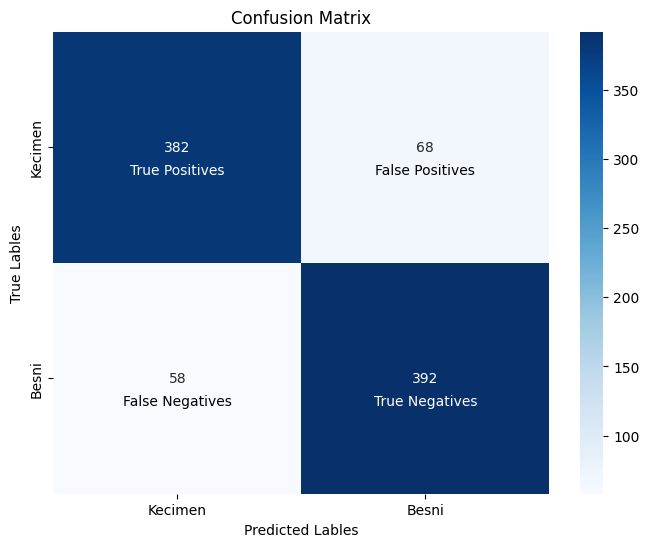


 Accuracy of Pooled Covariance Matrix: 0.86


In [8]:
# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix_pooled, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Kecimen", "Besni"],
            yticklabels=["Kecimen", "Besni"])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Lables')
plt.ylabel('True Lables')

plt.text(0.5, 0.6, f'True Positives', ha='center',
         va='center', color='white', fontsize=10)
plt.text(1.5, 0.6, f'False Positives', ha='center',
         va='center', color='black', fontsize=10)
plt.text(0.5, 1.6, f'False Negatives', ha='center',
         va='center', color='black', fontsize=10)
plt.text(1.5, 1.6, f'True Negatives', ha='center',
         va='center', color='white', fontsize=10)
plt.show()

print(f"\n Accuracy of Pooled Covariance Matrix: {accPooled:.2f}")

To analyze accuracy of the confusion matrix we determine:
- False positive rate
- False negative rate
- True positive rate
- True negative rate

In [9]:
def calculate_rates(confusion_matrix):
    # Unpack the confusion matrix
    tn, fp, fn, tp = confusion_matrix.ravel()

    false_positive_rate = fp / (fp + tn)
    false_negative_rate = fn / (fn + tp)
    true_positive_rate = tp / (tp + fn)
    true_negative_rate = tn / (tn + fp)
    return (false_positive_rate, false_negative_rate,
            true_positive_rate, true_negative_rate)


# Calculate rates using the confusion matrix
(fpr_p, fnr_p, tpr_p, tnr_p) = calculate_rates(confusionMatrix_pooled)

print("Rates for Pooled Covariance Matrix:")
print("False Positive Rate:", fpr_p)
print("False Negative Rate:", fnr_p)
print("True Positive Rate:", tpr_p)
print("True Negative Rate:", tnr_p)

Rates for Pooled Covariance Matrix:
False Positive Rate: 0.1511111111111111
False Negative Rate: 0.1288888888888889
True Positive Rate: 0.8711111111111111
True Negative Rate: 0.8488888888888889


Concidering the "Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "Extent", and "Perimeter" to be independent variables to make make plots.  
The goal is to make multiple graphs within one loop and analyze the relation between the dependent and independent variables.  
The code below visualizes the relationships between the independent variables and the dependent variable.

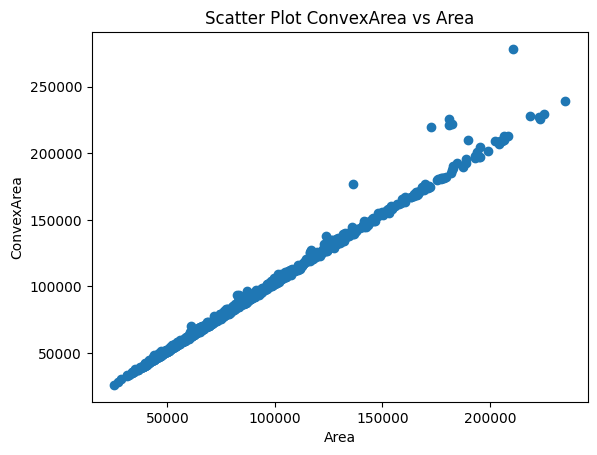

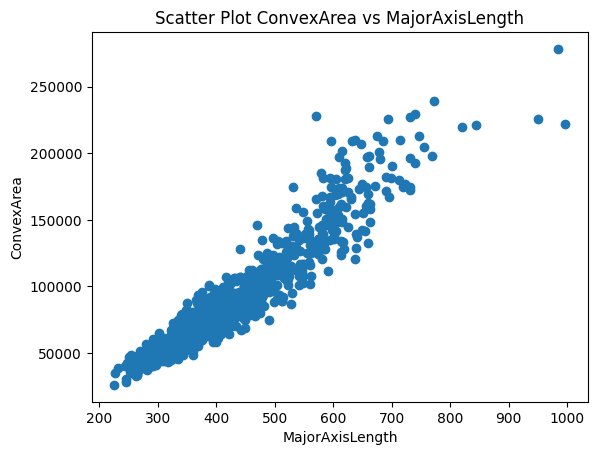

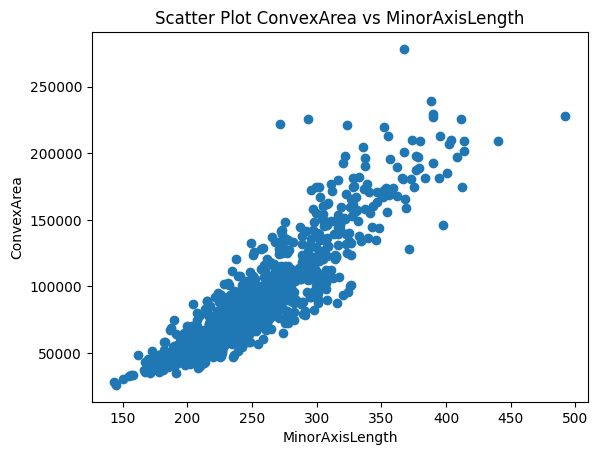

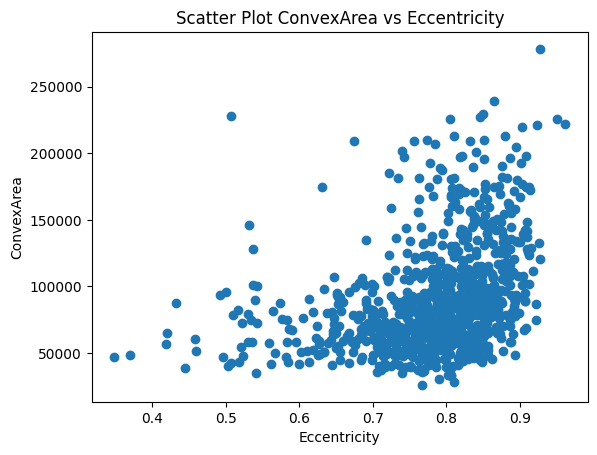

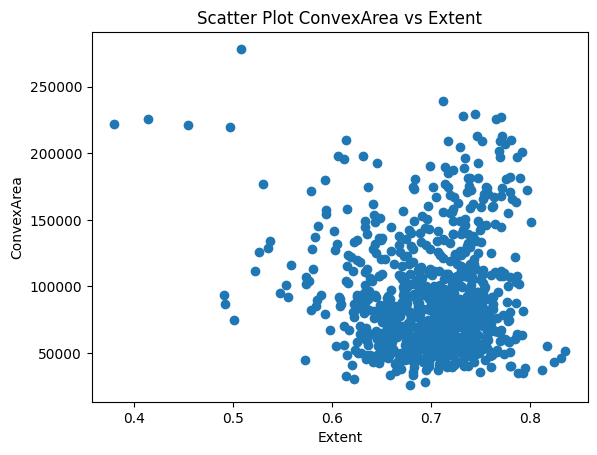

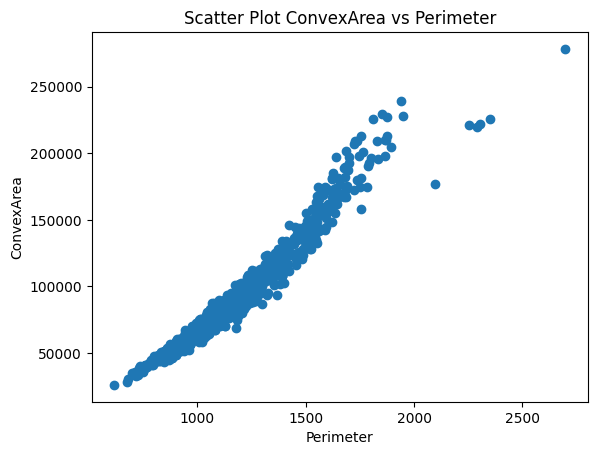

In [10]:
indVar = ["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity",
          "Extent", "Perimeter"]
depVar = "ConvexArea"

# Create a scatter plot of the independent var against the dependent variable
for var in indVar:
    plt.scatter(data[var], data["ConvexArea"])
    plt.title("Scatter Plot ConvexArea vs " + var)
    plt.xlabel(var)
    plt.ylabel("ConvexArea")
    plt.show()

Area, MajorAxis length, minor axis, Perimete have linearly increasing graph when polt against Convex Axis as ConvexArea gives the number of pixels of the smallest convex shell of the region formed by the raisin they are expected to increase. Where as Extent, Eccentricity have least dependency.

In [11]:
# Using first 600 data pts as training data
trainData = data.iloc[600:]
model = LinearRegression()
X_train = trainData[indVar]
y_train = trainData[depVar]

# Fit the machine learning model on the reduced-dimension training data
model.fit(X_train, y_train)

# Using last 300 data pts as testing data
testData = data.iloc[:300]
X_test = testData[indVar]
y_test = testData[depVar]
y_pred = model.predict(X_test)

# Calculating mean squared error of predicted vs actual
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.3f}")

Mean Squared Error (MSE): 4996441.2507106075
R-squared (R2): 0.988


The MSE and R2 score are used to evaluate the performance of the model.  
Seeing R2 score, which should range between 0 and 1, with 1 being highest accuracy. The model has a good prediction performance with high R2 score.  

## Principal Component Analysis
PCA is a unsupervised learnin methord used for dimensionality reduction. It finds the linear combinition of the variable that best explains the data
***
# Data Scaling
Feature scaling through standardization, also called Z-score normalization, is an important preprocessing step for many machine learning algorithms. It involves rescaling each feature such that it has a standard deviation of 1 and a mean of 0.
Principle Component Analysis (PCA) is impacted by normalization of features by removing the mean and scaling to unit variance.
***
The code below performs PCA on standardized data, calculates the explained variance ratio for each principal component, and visualizes the results using a Pareto Chart. The Pareto Chart helps to understand the contribution of each component to the overall variance in the data.

Explained variance Ratio: [0.61443792 0.25617593 0.11852322 0.00713272 0.0028994  0.00083081]


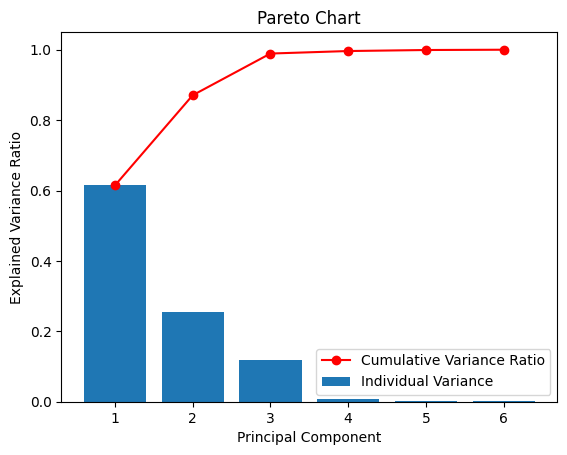

In [12]:
pca = PCA()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Determine the number of principal components
num_components = len(explained_variance_ratio)

# Create a list of component numbers for plotting
components = range(1, num_components + 1)

print("Explained variance Ratio:", explained_variance_ratio)

# Create a Pareto Chart
plt.figure()
plt.title('Pareto Chart')
plt.xlabel('Principal Component')
plt.ylabel('PoV')
plt.bar(components, explained_variance_ratio, align='center',
        label='Individual Variance')
plt.legend()

plt.plot(components, cumulative_variance_ratio, marker='o', color='r',
         label='Cumulative Variance Ratio')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

Explained Variance Ratio is percentage of variance explained by each principal components.
In the Pareto chart, the bars correspond to each principal component and shows the percentage explained by each component.

In [13]:
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print(f"Number of components needed for >=90% variance: {n_components}",
      f"with {cumulative_variance_ratio[n_components - 1]*100:.2f}% var")

Number of components needed for >=90% variance: 3 with 98.91% var


Having a large number of dimensions in the features can mean that the space is very large and requires more computational resources.  
Reducing the Dimensions to reduces time & space complexity. And save the cost of observing the feature.  
Concidering the First 3 Principal components whose sum of explained variance ratio relatively reaches 90%

In [14]:
# Create a PCA with 3 components
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.3f}")

Mean Squared Error (MSE): 7503363.27
R-squared (R2): 0.981


Seeing R2 score, which should range between 0 and 1, with 1 being highest accuracy.  
The initial PCA's R-squared score was 0.988 and PCA with 3 Principal Components has relatively similar score of 0.981.
The model has a relatively same prediction performance with high R2 score with minimum loss of information. 

In [15]:
# Create a PCA with 2 components
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.3f}")

Mean Squared Error (MSE): 6943815.12
R-squared (R2): 0.983


In [16]:
# Create a PCA with 1 components
pca = PCA(1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.3f}")

Mean Squared Error (MSE): 9683585.08
R-squared (R2): 0.976


The R-squared (R2) score was 0.981 with three principal components and 0.983 with two principal components. Surprisingly, the dataset trained with two principal components exhibited better performance than three principal components. This unexpected result highlights the importance of performing analysis of data at multiple stages to ensure the reliability of findings.

flake8: 0 Errors